In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import geopandas as gpd
import os
import missingno as msg

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 14
plt.rcParams['font.family'] = 'serif'
sns.set_palette("deep")
sns.set_style("whitegrid")

## 1. **Load Dataset**

In [109]:
# https://www.kaggle.com/datasets/imdevskp/corona-virus-report

file_path = "./covid_19.csv"

covid_df = pd.read_csv(file_path)
covid_df.head()

,country,date,total_cases,new_cases,new_cases_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths,new_deaths,...,population,population_density,median_age,life_expectancy,gdp_per_capita,extreme_poverty,diabetes_prevalence,handwashing_facilities,hospital_beds_per_thousand,human_development_index
0,Afghanistan,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,40578801.0,62.215477,16.752,NaN,1516.2733,NaN,10.9,48.214695,0.39,0.462
1,Afghanistan,2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,40578801.0,62.215477,16.752,NaN,1516.2733,NaN,10.9,48.214695,0.39,0.462
2,Afghanistan,2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,40578801.0,62.215477,16.752,NaN,1516.2733,NaN,10.9,48.214695,0.39,0.462
3,Afghanistan,2020-01-04,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,...,40578801.0,62.215477,16.752,NaN,1516.2733,NaN,10.9,48.214695,0.39,0.462
4,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,...,40578801.0,62.215477,16.752,NaN,1516.2733,NaN,10.9,48.214695,0.39,0.462


In [110]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300749 entries, 0 to 300748
Data columns (total 61 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   country                                     300749 non-null  object 
 1   date                                        300749 non-null  object 
 2   total_cases                                 293028 non-null  float64
 3   new_cases                                   291678 non-null  float64
 4   new_cases_smoothed                          290951 non-null  float64
 5   total_cases_per_million                     293028 non-null  float64
 6   new_cases_per_million                       291678 non-null  float64
 7   new_cases_smoothed_per_million              290951 non-null  float64
 8   total_deaths                                293028 non-null  float64
 9   new_deaths                                  291698 non-null  float64
 

In [111]:
covid_df.describe()

,total_cases,new_cases,new_cases_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths,new_deaths,new_deaths_smoothed,total_deaths_per_million,...,population,population_density,median_age,life_expectancy,gdp_per_capita,extreme_poverty,diabetes_prevalence,handwashing_facilities,hospital_beds_per_thousand,human_development_index
count,2.930280e+05,2.916780e+05,2.909510e+05,293028.000000,291678.000000,290951.000000,2.930280e+05,291698.000000,290960.000000,293028.000000,...,2.971420e+05,291328.000000,295208.000000,0.0,244684.000000,195201.000000,264087.000000,139033.000000,187317.000000,247323.000000
mean,7.788107e+06,6.667573e+03,6.684336e+03,130678.160584,111.581281,111.865677,7.037217e+04,51.072774,51.202516,927.879955,...,1.183772e+08,462.719681,30.957161,NaN,21793.332884,11.267399,8.470804,57.766014,3.209858,0.721925
std,3.872321e+07,8.746162e+04,7.078580e+04,178306.993208,945.659713,523.103927,2.991644e+05,426.303837,342.282760,1148.098229,...,5.102735e+08,2133.485032,9.607209,NaN,21952.815030,19.056785,4.940658,32.949303,2.596382,0.154035
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,...,3.475000e+03,0.136360,14.298000,NaN,708.178300,0.000000,1.100000,3.440189,0.300000,0.387000
25%,1.133950e+04,0.000000e+00,0.000000e+00,3357.801800,0.000000,0.000000,9.800000e+01,0.000000,0.000000,53.934026,...,5.196940e+05,44.280000,22.529000,NaN,5480.330000,0.243796,5.500000,24.221037,1.300000,0.608000
50%,8.518050e+04,0.000000e+00,7.857143e+00,43151.425000,0.000000,1.758935,9.470000e+02,0.000000,0.000000,424.384640,...,5.097987e+06,92.203400,30.980000,NaN,13939.787000,1.318269,7.100000,66.647510,2.730000,0.741000
75%,8.318545e+05,8.400000e+01,2.030000e+02,198174.010000,11.964611,41.109970,1.035300e+04,1.000000,2.000000,1500.152300,...,2.307259e+07,222.544450,39.080000,NaN,34663.496000,15.617013,10.513726,89.304020,4.490000,0.849000
max,4.299517e+08,7.213802e+06,6.109825e+06,769887.940000,211223.020000,32698.440000,3.032581e+06,55431.000000,8698.000000,5679.174000,...,4.746327e+09,21342.697000,54.975000,NaN,117746.990000,80.730060,25.200000,100.000000,13.800000,0.959000


In [112]:
covid_df.shape

(300749, 61)

In [113]:
covid_df.isnull().sum()

country                            0
date                               0
total_cases                     7721
new_cases                       9071
new_cases_smoothed              9798
                               ...  
extreme_poverty               105548
diabetes_prevalence            36662
handwashing_facilities        161716
hospital_beds_per_thousand    113432
human_development_index        53426
Length: 61, dtype: int64

In [114]:
covid_df.columns

Index(['country', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed',
       'total_cases_per_million', 'new_cases_per_million',
       'new_cases_smoothed_per_million', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_deaths_per_million',
       'new_deaths_per_million', 'new_deaths_smoothed_per_million',
       'excess_mortality', 'excess_mortality_cumulative',
       'excess_mortality_cumulative_absolute',
       'excess_mortality_cumulative_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'icu_patients',
       'icu_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'stringency_index',
       'reproduction_rate', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'total_vaccinations',
    

## 2. **Data Cleaning** ##

### **Task A**: Filter countries of interest (EA countries were chosen)

In [115]:
# filter countries
covid_df = covid_df[covid_df['country'] \
    .isin(['Kenya', 'Ethiopia', 'Burkina Faso', 'Egypt', 'Burundi'])]
covid_df['country'].unique()

array(['Burkina Faso', 'Burundi', 'Egypt', 'Ethiopia', 'Kenya'],
      dtype=object)

In [116]:
covid_df = covid_df[['date', 'country', 'total_cases', 'total_deaths', 'total_vaccinations',
    'new_cases', 'new_deaths', 'population', 'code']]
covid_df.head()

,date,country,total_cases,total_deaths,total_vaccinations,new_cases,new_deaths,population,code
68074,2020-01-01,Burkina Faso,NaN,NaN,NaN,NaN,NaN,22508995.0,BFA
68075,2020-01-02,Burkina Faso,NaN,NaN,NaN,NaN,NaN,22508995.0,BFA
68076,2020-01-03,Burkina Faso,NaN,NaN,NaN,NaN,NaN,22508995.0,BFA
68077,2020-01-04,Burkina Faso,0.0,0.0,NaN,0.0,0.0,22508995.0,BFA
68078,2020-01-05,Burkina Faso,0.0,0.0,NaN,0.0,0.0,22508995.0,BFA


### **Task B:** Drop rows with missing dates/critical values.

In [117]:
covid_df.shape

(9694, 9)

In [118]:
covid_df = covid_df.dropna(subset=['date'])
covid_df.isnull().sum()

date                     0
country                  0
total_cases             24
total_deaths            24
total_vaccinations    8896
new_cases               26
new_deaths              24
population               0
code                     0
dtype: int64

### **Task C:** Convert date column to datetime: pd.to_datetime().

In [119]:
covid_df['date'] = pd.to_datetime(covid_df['date'])
covid_df['date'].min(), covid_df['date'].max()

(Timestamp('2020-01-01 00:00:00'), Timestamp('2025-12-31 00:00:00'))

In [120]:
covid_df['country'].value_counts()


country
Egypt           1946
Burkina Faso    1937
Burundi         1937
Ethiopia        1937
Kenya           1937
Name: count, dtype: int64

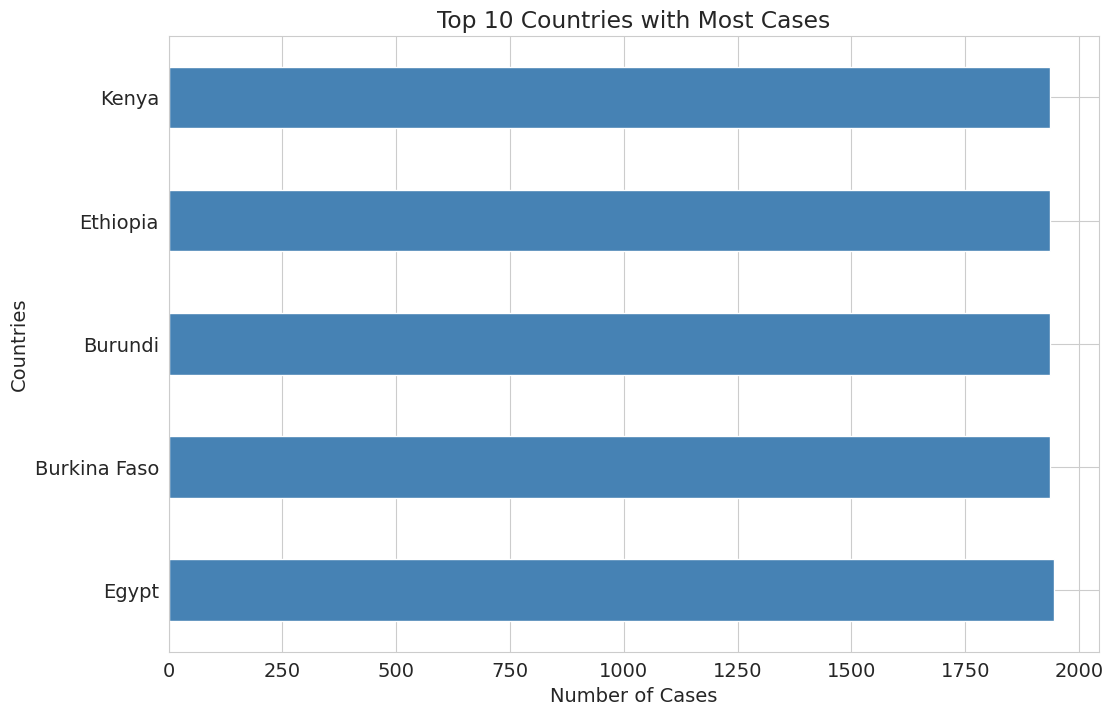

In [121]:
covid_df['country'].value_counts().plot(kind='barh', figsize=(12, 8), color='steelblue')
plt.title('Top 10 Countries with Most Cases')
plt.xlabel('Number of Cases')
plt.ylabel('Countries')
plt.show()

### **Task D:** Handle missing numeric values with fillna() or interpolate().

In [122]:
# handle missing values
covid_df.isnull().sum()

date                     0
country                  0
total_cases             24
total_deaths            24
total_vaccinations    8896
new_cases               26
new_deaths              24
population               0
code                     0
dtype: int64

In [123]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9694 entries, 68074 to 226484
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                9694 non-null   datetime64[ns]
 1   country             9694 non-null   object        
 2   total_cases         9670 non-null   float64       
 3   total_deaths        9670 non-null   float64       
 4   total_vaccinations  798 non-null    float64       
 5   new_cases           9668 non-null   float64       
 6   new_deaths          9670 non-null   float64       
 7   population          9694 non-null   float64       
 8   code                9694 non-null   object        
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 757.3+ KB


In [124]:
covid_df.bfill()
covid_df.head()

,date,country,total_cases,total_deaths,total_vaccinations,new_cases,new_deaths,population,code
68074,2020-01-01,Burkina Faso,NaN,NaN,NaN,NaN,NaN,22508995.0,BFA
68075,2020-01-02,Burkina Faso,NaN,NaN,NaN,NaN,NaN,22508995.0,BFA
68076,2020-01-03,Burkina Faso,NaN,NaN,NaN,NaN,NaN,22508995.0,BFA
68077,2020-01-04,Burkina Faso,0.0,0.0,NaN,0.0,0.0,22508995.0,BFA
68078,2020-01-05,Burkina Faso,0.0,0.0,NaN,0.0,0.0,22508995.0,BFA


In [125]:
# Convert float64 columns to integers
float_cols = covid_df.select_dtypes(include=['float64']).columns

# Fill NaN values with the next valid observation (backward fill)
for col in float_cols:
    covid_df[col] = covid_df[col].fillna(0) \
        .astype(int) # Convert to int

covid_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9694 entries, 68074 to 226484
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                9694 non-null   datetime64[ns]
 1   country             9694 non-null   object        
 2   total_cases         9694 non-null   int64         
 3   total_deaths        9694 non-null   int64         
 4   total_vaccinations  9694 non-null   int64         
 5   new_cases           9694 non-null   int64         
 6   new_deaths          9694 non-null   int64         
 7   population          9694 non-null   int64         
 8   code                9694 non-null   object        
dtypes: datetime64[ns](1), int64(6), object(2)
memory usage: 757.3+ KB


In [126]:
covid_df.isnull().sum()

date                  0
country               0
total_cases           0
total_deaths          0
total_vaccinations    0
new_cases             0
new_deaths            0
population            0
code                  0
dtype: int64

## 3. **Exploratory Data Analysis (EDA)**

### **Task A:** Plot total cases over time for selected countries.

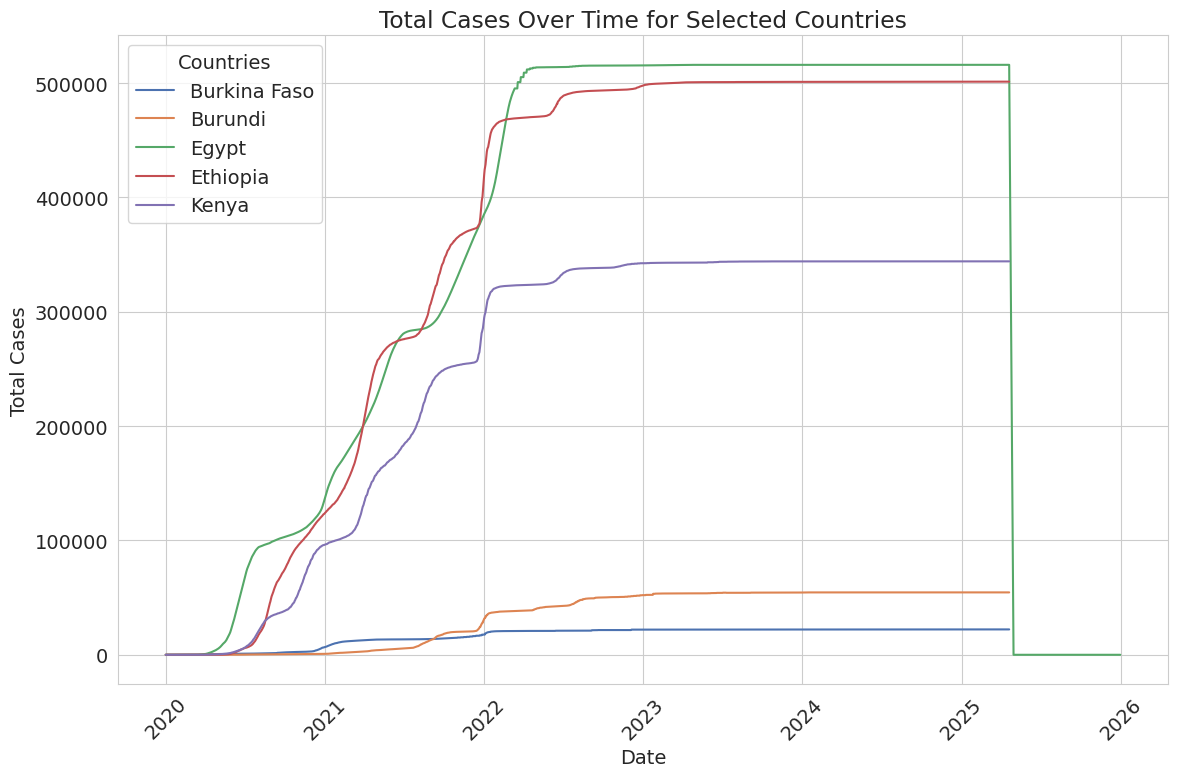

In [127]:
plt.figure(figsize=(12, 8))
for country in covid_df['country'].unique():
    country_data = covid_df[covid_df['country'] == country]
    plt.plot(country_data['date'], country_data['total_cases'], label=country)

plt.title('Total Cases Over Time for Selected Countries')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend(title='Countries')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [128]:
covid_ts = covid_df[['date', 'country', 'total_cases']].copy()
covid_pivoted = covid_ts.pivot(index='date', columns='country', values='total_cases')

# Optionally, reset the index if you want 'date' as a column when dealing with time series data
covid_pivoted = covid_pivoted.reset_index()
covid_pivoted.head()

country,date,Burkina Faso,Burundi,Egypt,Ethiopia,Kenya
0,2020-01-01,0.0,0.0,0.0,0.0,0.0
1,2020-01-02,0.0,0.0,0.0,0.0,0.0
2,2020-01-03,0.0,0.0,0.0,0.0,0.0
3,2020-01-04,0.0,0.0,0.0,0.0,0.0
4,2020-01-05,0.0,0.0,0.0,0.0,0.0


In [129]:
fig = px.line(
    covid_df,
    x='date',
    y='total_cases',
    color='country',
    title='Total Cases Over Time for Selected Countries',
    labels={'date': 'Date', 'total_cases': 'Total Cases'}
)
fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Total Cases',
    legend_title='Country',
    template='plotly_white'
)
fig.show()

### **Task B:** Plot total deaths over time.

In [130]:
fig = px.line(
    covid_df,
    x='date',
    y='total_deaths',
    color='country',
    title='Total Deaths Over Time for Selected Countries',
    labels={'date': 'Date', 'total_deaths': 'Total Deaths'}
)
fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Total Deaths',
    legend_title='Country',
    template='plotly_white'
)
fig.show()

### **Task C:** Compare daily new cases between countries.

In [131]:
fig = px.line(
    covid_df,
    x='date',
    y='new_cases',
    color='country',
    title='Daily New Cases Over Time for Selected Countries',
    labels={'date': 'Date', 'new_cases': 'Daily New Cases'}
)
fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Daily New Cases',
    legend_title='Country',
    template='plotly_white'
)
fig.show()

### **Task D:** Calculate the death rate: total_deaths / total_cases.

In [132]:
covid_df['death_rate'] = (covid_df['total_deaths'] / covid_df['total_cases']) # * 100

In [133]:
covid_df.head()

,date,country,total_cases,total_deaths,total_vaccinations,new_cases,new_deaths,population,code,death_rate
68074,2020-01-01,Burkina Faso,0,0,0,0,0,22508995,BFA,NaN
68075,2020-01-02,Burkina Faso,0,0,0,0,0,22508995,BFA,NaN
68076,2020-01-03,Burkina Faso,0,0,0,0,0,22508995,BFA,NaN
68077,2020-01-04,Burkina Faso,0,0,0,0,0,22508995,BFA,NaN
68078,2020-01-05,Burkina Faso,0,0,0,0,0,22508995,BFA,NaN


In [134]:
covid_df.dropna(subset=['death_rate'], inplace=True)
covid_df.head()

,date,country,total_cases,total_deaths,total_vaccinations,new_cases,new_deaths,population,code,death_rate
68143,2020-03-10,Burkina Faso,2,0,0,2,0,22508995,BFA,0.0
68144,2020-03-11,Burkina Faso,2,0,0,0,0,22508995,BFA,0.0
68145,2020-03-12,Burkina Faso,2,0,0,0,0,22508995,BFA,0.0
68146,2020-03-13,Burkina Faso,3,0,0,1,0,22508995,BFA,0.0
68147,2020-03-14,Burkina Faso,7,0,0,4,0,22508995,BFA,0.0


In [135]:
# Aggregate total cases by country
top_countries = covid_df.groupby('country')['total_cases']\
    .max().sort_values(ascending=False) \
        .head(10).reset_index()

# Plot bar chart
fig = px.bar(
    top_countries,
    x='country',
    y='total_cases',
    title='Top 10 Countries by Total Cases',
    labels={'country': 'Country', 'total_cases': 'Total Cases'},
    color='total_cases',
    color_continuous_scale='Blues'
)
fig.update_layout(
    xaxis_title='Country',
    yaxis_title='Total Cases',
    template='plotly_white'
)
fig.show()

Egypt has the largest number total cases reported followed by Ethiopia and the last country with lowest number of total cases is Burkina Faso.

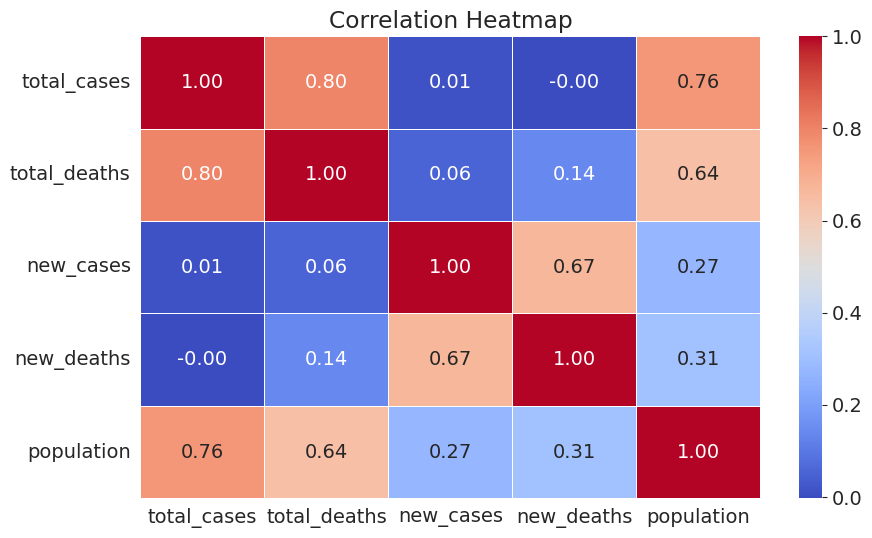

In [136]:
# Compute the correlation matrix
correlation_matrix = covid_df[['total_cases', 'total_deaths', 'new_cases', 'new_deaths', 'population']].corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    correlation_matrix, 
    annot=True, 
    cmap='coolwarm', 
    fmt='.2f', 
    linewidths=0.5
)
plt.title('Correlation Heatmap')
plt.show()

#### Correlation usually ranges from 0 < ρ < 1. The columns that seem to be correlated are: 

✔️ total_cases and total_deaths with a higher correlation of 0.8

✔️ total_cases and population with a correlation of 0.76

✔️ total_deaths and population with a correlation of 0.64

✔️ new_deaths and new_cases with a correlation of 0.67

## 4. **Visualizing Vaccination Progress**

### **Task A:** Plot cumulative vaccinations over time for selected countries.

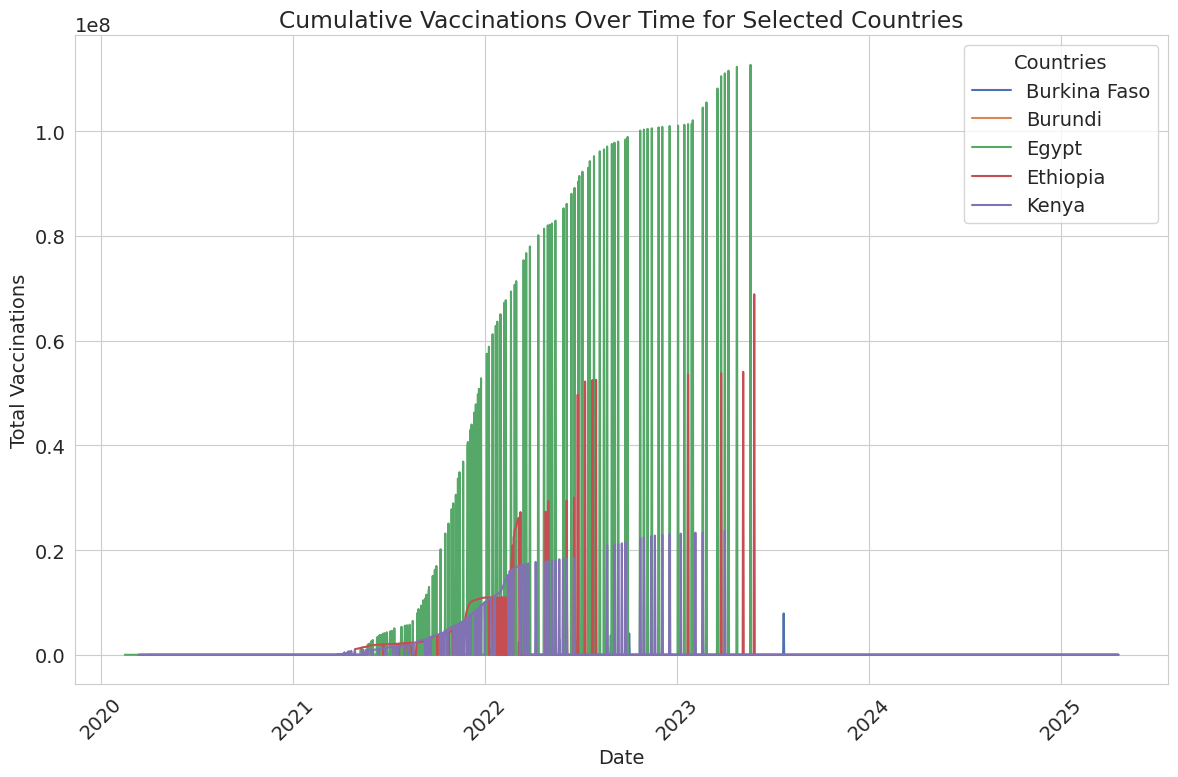

In [137]:
# Plot cumulative vaccinations over time
plt.figure(figsize=(12, 8))
for country in covid_df['country'].unique():
    country_data = covid_df[covid_df['country'] == country]
    plt.plot(country_data['date'], country_data['total_vaccinations'], label=country)

plt.title('Cumulative Vaccinations Over Time for Selected Countries')
plt.xlabel('Date')
plt.ylabel('Total Vaccinations')
plt.legend(title='Countries')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [138]:
fig = px.line(
    covid_df,
    x='date',
    y='total_vaccinations',
    color='country',
    title='Cumulative Vaccinations Over Time for Selected Countries',
    labels={'date': 'Date', 'total_vaccinations': 'Total Vaccinations'}
)
fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Total Vaccinations',
    legend_title='Country',
    template='plotly_white'
)
fig.show()

### **Task B:** Compare % vaccinated population.

In [139]:
# Calculate the percentage of vaccinated population
covid_df['percent_vaccinated'] = (covid_df['total_vaccinations'] / covid_df['population']) * 100

# Aggregate the latest percentage for each country
latest_vaccination_data = covid_df.groupby('country')['percent_vaccinated'].max().sort_values(ascending=False)

In [140]:
latest_vaccination_data.head()

country
Egypt           100.049147
Ethiopia         54.916621
Kenya            43.777658
Burkina Faso     35.068687
Burundi           0.317182
Name: percent_vaccinated, dtype: float64

In [141]:
latest_vaccination_data.dtype

dtype('float64')

In [142]:
latest_vaccination_data = pd.DataFrame(latest_vaccination_data).head()
latest_vaccination_data.head()

,percent_vaccinated
country,
Egypt,100.049147
Ethiopia,54.916621
Kenya,43.777658
Burkina Faso,35.068687
Burundi,0.317182


<Figure size 1200x800 with 0 Axes>

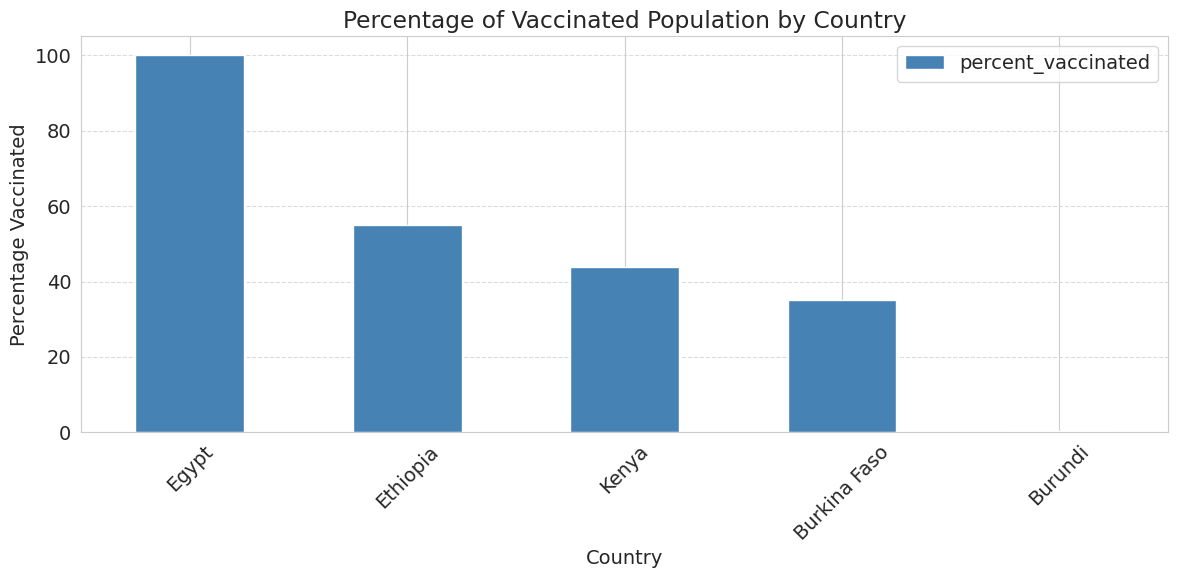

In [143]:
plt.figure(figsize=(12, 8))
latest_vaccination_data.plot(kind='bar', color='steelblue')
plt.title('Percentage of Vaccinated Population by Country')
plt.xlabel('Country')
plt.ylabel('Percentage Vaccinated')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [144]:
fig = px.bar(
    latest_vaccination_data,
    # x='country',
    y='percent_vaccinated',
    title='Percentage of Vaccinated Population by Country',
    labels={'country': 'Country', 'percent_vaccinated': 'Percentage Vaccinated'},
    color='percent_vaccinated',
    color_continuous_scale='Blues'
)
fig.update_layout(
    xaxis_title='Country',
    yaxis_title='Percentage Vaccinated',
    template='plotly_white'
)
fig.show()

✔️ The country that almost vaccinated entire of its population is Egypt with a vaccination rate of 100% of its total population.

✔️ The countries that didn't meet 50% vaccination of their respective populations were Kenya, Burkina Faso and Burundi.

## 5. **Build a Choropleth map**

In [145]:
latest_date = covid_df['date'].max()
latest_data = covid_df[covid_df['date'] == latest_date]

latest_data.rename(columns={'code': 'iso_code'}, inplace=True)
latest_data.head()

,date,country,total_cases,total_deaths,total_vaccinations,new_cases,new_deaths,population,iso_code,death_rate,percent_vaccinated
70010,2025-04-20,Burkina Faso,22201,400,0,0,0,22508995,BFA,0.018017,0.0
71947,2025-04-20,Burundi,54575,15,0,0,0,13321056,BDI,0.000275,0.0
125704,2025-04-20,Egypt,516023,24830,0,0,0,112618191,EGY,0.048118,0.0
139049,2025-04-20,Ethiopia,501314,7574,0,0,0,125384244,ETH,0.015108,0.0
226484,2025-04-20,Kenya,344133,5689,0,0,0,54252404,KEN,0.016531,0.0


In [146]:
fig = px.choropleth(
    latest_data,
    locations='iso_code',
    color='total_cases',
    hover_name='iso_code',
    title='Global COVID-19 Case Density',
    color_continuous_scale='Reds',
    labels={'total_cases': 'Total Cases'}
)
fig.update_layout(
    geo=dict(showframe=False, showcoastlines=False, projection_type='equirectangular'),
    template='plotly_white'
)
fig.show()